# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# url = "https://api.openweathermap.org/data/2.5/weather?"
# query2_url = url + "appid=" + weather_api_key + "&q=" + city 
# weather_response=requests.get(query2_url)
# weather_json = weather_response.json()
# pprint(weather_json)

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ixtapa
Processing Record 2 of Set 1 | cochrane
Processing Record 3 of Set 1 | sena madureira
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | meridian
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | aswan
Processing Record 11 of Set 1 | steinbach
Processing Record 12 of Set 1 | kirakira
Processing Record 13 of Set 1 | yerbogachen
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | naze
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | lasa
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | soyo
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | sovetskiy
Processing Record 22 of Set 1 | hovd
Processing Record 23 of Set 1 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [6]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ixtapa,20.7000,-105.2000,33.89,21,98,3.89,MX,1680544315
1,cochrane,51.1834,-114.4687,0.83,62,100,3.60,CA,1680544315
2,sena madureira,-9.0656,-68.6569,29.41,67,94,2.13,BR,1680544315
3,mataura,-46.1927,168.8643,14.71,85,92,0.73,NZ,1680544315
4,ushuaia,-54.8000,-68.3000,16.81,36,20,7.20,AR,1680544128


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ixtapa,20.7000,-105.2000,33.89,21,98,3.89,MX,1680544315
1,cochrane,51.1834,-114.4687,0.83,62,100,3.60,CA,1680544315
2,sena madureira,-9.0656,-68.6569,29.41,67,94,2.13,BR,1680544315
3,mataura,-46.1927,168.8643,14.71,85,92,0.73,NZ,1680544315
4,ushuaia,-54.8000,-68.3000,16.81,36,20,7.20,AR,1680544128


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

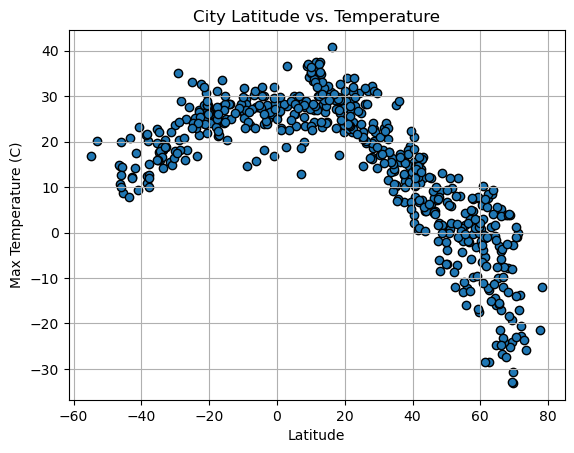

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

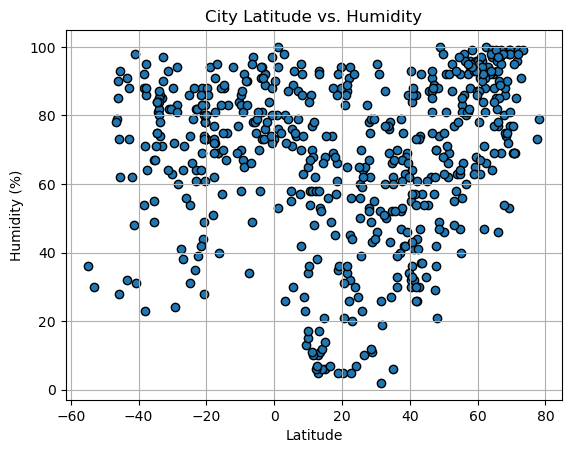

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

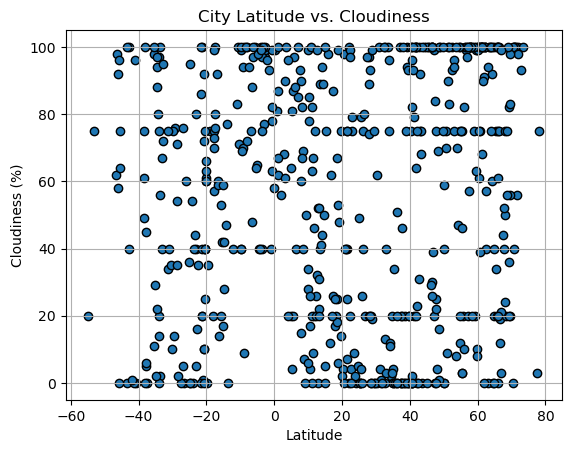

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

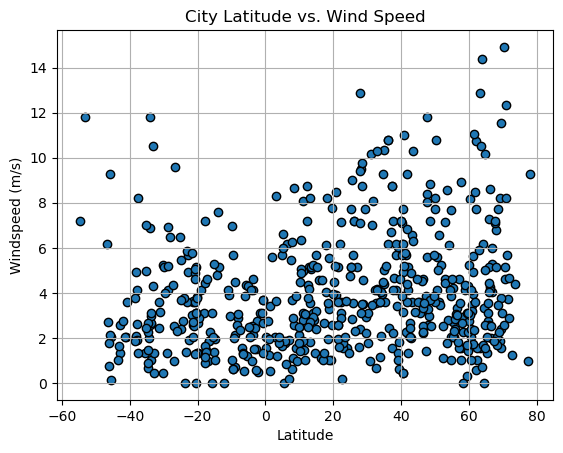

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Windspeed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
norther_hemi_filter_s = city_data_df['Lat'] >= 0
northern_hemi_df = city_data_df[norther_hemi_filter_s]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ixtapa,20.7000,-105.2000,33.89,21,98,3.89,MX,1680544315
1,cochrane,51.1834,-114.4687,0.83,62,100,3.60,CA,1680544315
5,meridian,43.6121,-116.3915,4.73,57,0,10.29,US,1680544315
6,kodiak,57.7900,-152.4072,-0.27,93,100,1.54,US,1680544316
8,aswan,24.0934,32.9070,30.61,7,0,1.54,EG,1680544202


In [14]:
~norther_hemi_filter_s.head()

City_ID
0    False
1    False
2     True
3     True
4     True
Name: Lat, dtype: bool

In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[~norther_hemi_filter_s]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sena madureira,-9.0656,-68.6569,29.41,67,94,2.13,BR,1680544315
3,mataura,-46.1927,168.8643,14.71,85,92,0.73,NZ,1680544315
4,ushuaia,-54.8000,-68.3000,16.81,36,20,7.20,AR,1680544128
7,hobart,-42.8794,147.3294,12.25,88,40,2.57,AU,1680544316
10,kirakira,-10.4544,161.9205,26.69,84,71,2.97,SB,1680544181


In [16]:
def linear_regression(df, x_col_name, y_col_name, hemi_name, coord):

    # Define a function to create Linear Regression plots
    x_values = df[x_col_name]
    y_values = df[y_col_name]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.title(f"{y_col_name} vs {x_col_name} for {hemi_name} hemisphere")
    #plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
    plt.annotate(line_eq, coord, fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7829366727591811


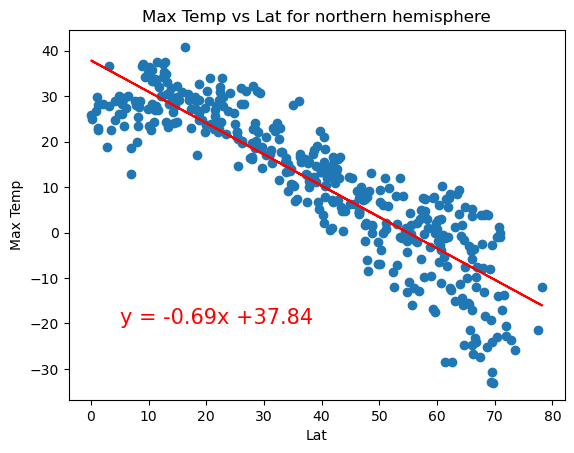

In [17]:
# Linear regression on Northern Hemisphere
# Perform a linear regression on latitude vs max temp
linear_regression(northern_hemi_df, "Lat", "Max Temp", "northern", (5,-20))

The r-value is: 0.47847861179362755


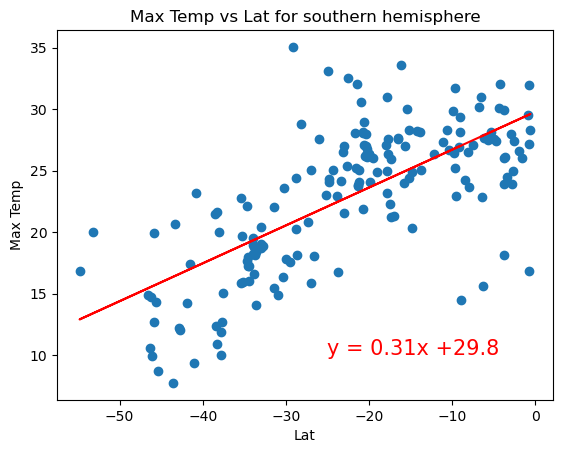

In [18]:
# Linear regression on Southern Hemisphere
# Perform a linear regression on latitude vs max temp
linear_regression(southern_hemi_df, "Lat", "Max Temp", "southern", (-25,10))

**Discussion about the linear relationship:** There is a negative correlation between the latitude and the maximum temperature on Northern hemisphere. On the other hand, a positive correlation exists between the latitude and the maxmimum temperature on Southern hemisphere. The r value for northern hemisphere showed a strong correlation, indicating the city with latitude which is closer to the equator has the higher maximum temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17578576997383816


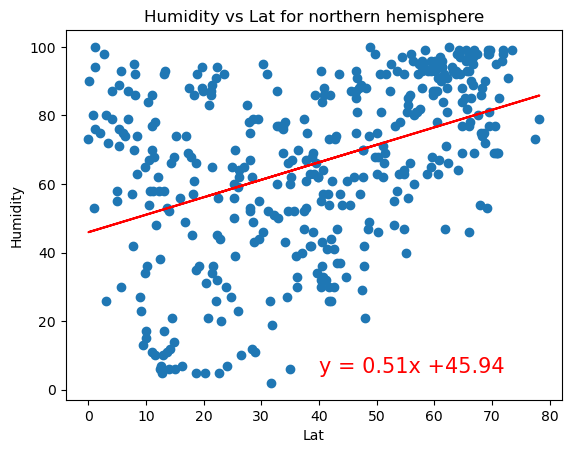

In [29]:
# Northern Hemisphere
# Perform a linear regression on latitude vs humidity
linear_regression(northern_hemi_df, "Lat", "Humidity", "northern", (40,5))

The r-value is: 0.043169220963007904


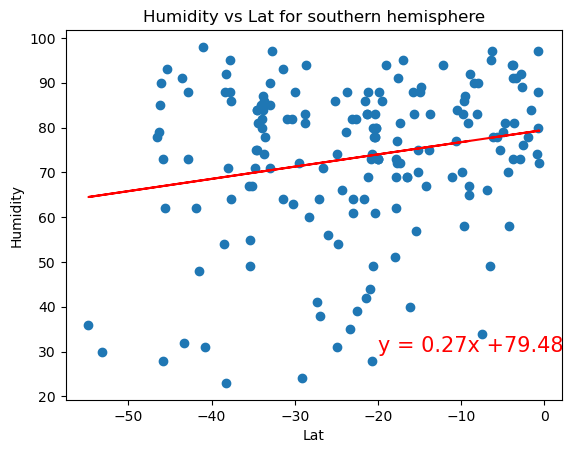

In [30]:
# Southern Hemisphere
# Perform a linear regression on latitude vs humidity
linear_regression(southern_hemi_df, "Lat", "Humidity", "southern", (-20,30))

**Discussion about the linear relationship:** There is a positive correlation between latitude and humidity on both northern and souther hemisphere. The r value for both cases show that there is a very weak correlation between the latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03265798023862346


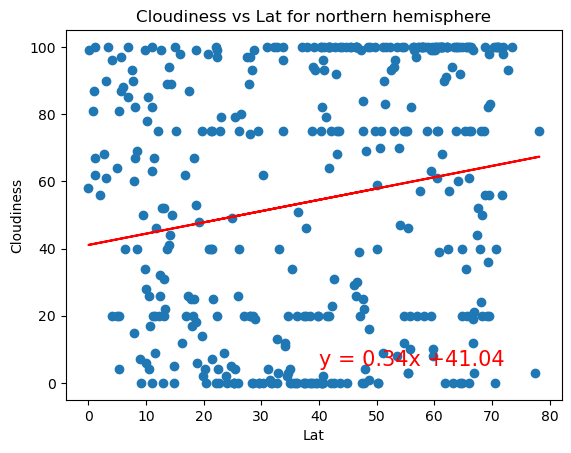

In [31]:
# Northern Hemisphere
# Perform a linear regression on latitude vs cloudiness
linear_regression(northern_hemi_df, "Lat", "Cloudiness", "northern", (40,5))

The r-value is: 0.07202085248813411


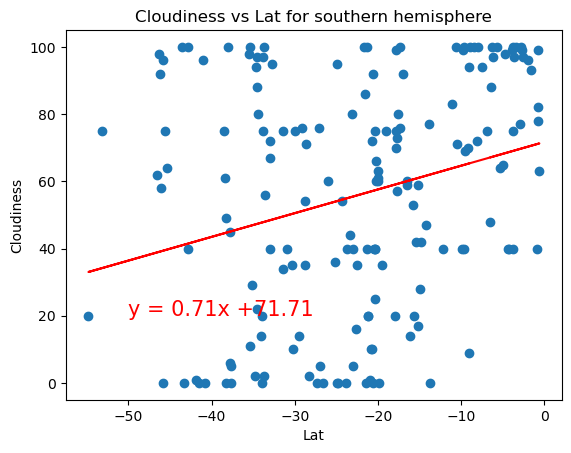

In [32]:
# Southern Hemisphere
# Perform a linear regression on latitude vs cloudiness
linear_regression(southern_hemi_df, "Lat", "Cloudiness", "southern", (-50,20))

**Discussion about the linear relationship:** There is a very weak correlation between latitude and cloudiness in both northern and southern hemisphere. Cloudiness is not affected by the latitude of a city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01324299958551745


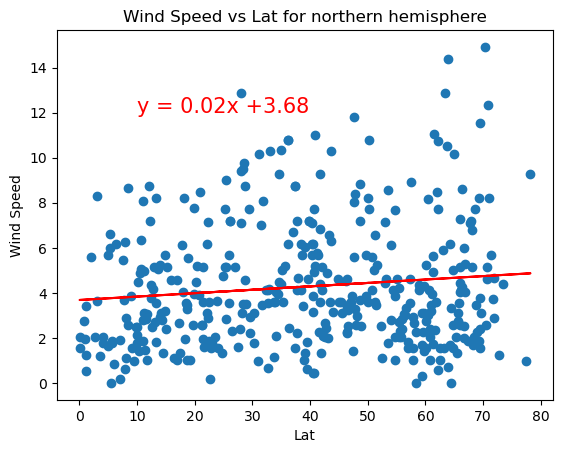

In [33]:
# Northern Hemisphere
# Perform a linear regression on latitude vs wind speed
linear_regression(northern_hemi_df, "Lat", "Wind Speed", "northern", (10,12))

The r-value is: 0.035285018090000786


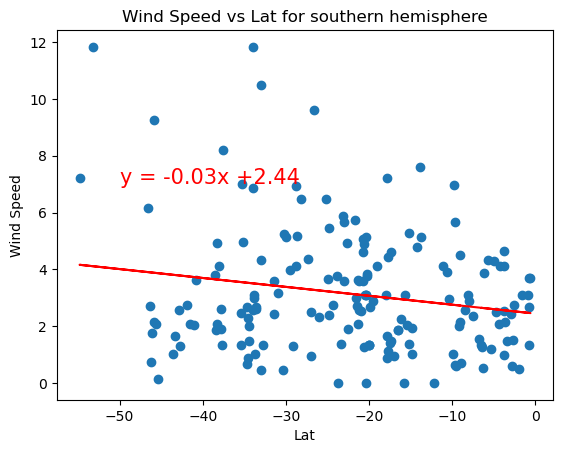

In [34]:
# Southern Hemisphere
# Perform a linear regression on latitude vs wind speed
linear_regression(southern_hemi_df, "Lat", "Wind Speed", "southern", (-50,7))

**Discussion about the linear relationship:** Again, there is a very weak correlation between latitude and wind speed in both northern and southern hemisphere. Wind speed is not affected by the latitude of a city.